In [1]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ete3 import Tree, TreeStyle, NodeStyle, faces
from PIL import Image
import io
import os
import tempfile
import random
from fuzzy_class import (
    Fuzzy,
    relative_substraction,
    relative_addition,
    relative_fraction,
    relative_multiplication,
)

# Test relative


## Test relative for multiplication


In [2]:
A = Fuzzy(0, 1, 3, 4)
B = Fuzzy(0, 10, 14, 20)
C = Fuzzy(0, 10, 42, 80)

A_fixed = Fuzzy(A.defuzzy(), A.defuzzy(), A.defuzzy(), A.defuzzy())
B_fixed = Fuzzy(B.defuzzy(), B.defuzzy(), B.defuzzy(), B.defuzzy())

share_A = A.multiply_by(B_fixed).high_uncertainty()
share_B = B.multiply_by(A_fixed).high_uncertainty()

print(share_A)
print(share_B)
print(C.high_uncertainty())
print()


12.0
4.0
16.0



In [3]:
A = Fuzzy(0, 1, 3, 4)
B = Fuzzy(0, 10, 14, 20)
C = B.substract(A)

print(C.high_uncertainty())
print(relative_substraction(C, B, A))

1.0
NOK sub
3.0
1.0
Comparison of relative sum vs total
1.0
1.0
(100, 0)


## Test relative for division


In [4]:
A = Fuzzy(1, 10, 14, 20)
B = Fuzzy(1, 2, 4, 10)
C = A.divide_by(B)

A_fixed = Fuzzy(A.defuzzy(), A.defuzzy(), A.defuzzy(), A.defuzzy())
B_fixed = Fuzzy(B.defuzzy(), B.defuzzy(), B.defuzzy(), B.defuzzy())

print(A.divide_by(B_fixed).high_uncertainty())
print(A_fixed.divide_by(B).high_uncertainty())
print(C.high_uncertainty())

0.666666666666667
1.5
2.25


# Check variations for A and B in division


In [5]:
for i in range(10000):
    a = random.randint(100, 500)
    b = random.randint(500, 1000)
    c = random.randint(1100, 2000)
    d = random.randint(2000, 3000)

    A = Fuzzy(0, a, b, b + 3)
    B = Fuzzy(0, c, d, d + 5413)
    C = A.multiply_by(B)

    A_fixed = Fuzzy(A.defuzzy(), A.defuzzy(), A.defuzzy(), A.defuzzy())
    B_fixed = Fuzzy(B.defuzzy(), B.defuzzy(), B.defuzzy(), B.defuzzy())

    uncertainty_a = A.multiply_by(B_fixed).high_uncertainty()
    uncertainty_b = B.multiply_by(A_fixed).high_uncertainty()

    uncertainty_tot = uncertainty_a + uncertainty_b
    if uncertainty_tot != C.high_uncertainty():
        print("NO")

In [6]:
import random

for i in range(10000):
    a = random.randint(100, 500)
    b = random.randint(500, 1000)
    c = random.randint(1100, 2000)
    d = random.randint(2000, 3000)

    A = Fuzzy(1, a, b, b + 3)
    B = Fuzzy(1, c, d, d + 5413)
    C = A.divide_by(B)

    A_fixed = Fuzzy(A.defuzzy(), A.defuzzy(), A.defuzzy(), A.defuzzy())
    B_fixed = Fuzzy(B.defuzzy(), B.defuzzy(), B.defuzzy(), B.defuzzy())

    uncertainty_a = A.divide_by(B_fixed).high_uncertainty()
    uncertainty_b = A_fixed.divide_by(B).high_uncertainty()

    uncertainty_tot = uncertainty_a + uncertainty_b

    if uncertainty_tot > C.high_uncertainty():
        print(uncertainty_a)
        print(uncertainty_b)
        print("-------")
        print(uncertainty_tot)
        print(C.high_uncertainty())
        print()
        print()

# Jamais au dessus donc ok

# Linearity


ON NE PEUT PAS UTILISER LE QUADRATIQUE EN LOGIQUE FLOUE


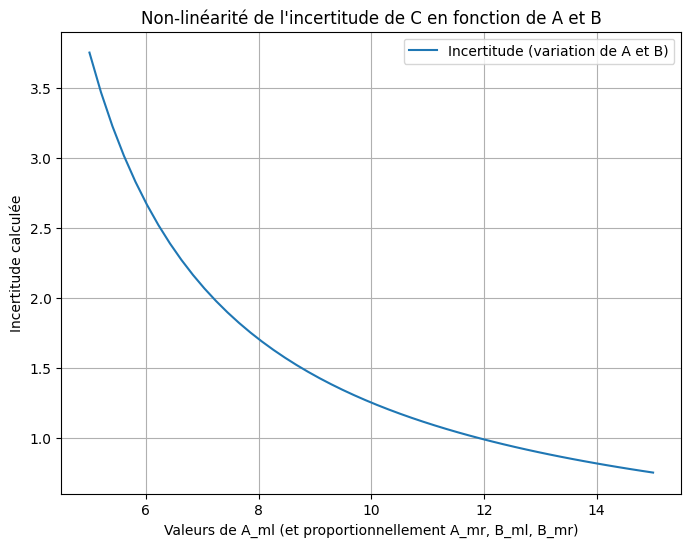

In [7]:
import matplotlib.pyplot as plt


# Fonction pour calculer l'incertitude selon la formule donnée
def calculate_uncertainty(A_ml, A_mr, B_ml, B_mr):
    C_mr = A_mr / B_ml
    C_ml = A_ml / B_mr
    return C_mr - (C_ml + C_mr) / 2


# Variation des valeurs de A et B
A_ml_values = np.linspace(5, 15, 50)  # Borne inférieure de A varie de 5 à 15
A_mr_values = np.linspace(10, 20, 50)  # Borne supérieure de A varie de 10 à 20
B_ml_values = np.linspace(1, 5, 50)  # Borne inférieure de B varie de 1 à 5
B_mr_values = np.linspace(2, 6, 50)  # Borne supérieure de B varie de 2 à 6

# Stocker les incertitudes calculées
uncertainties = []

# Calcul de l'incertitude pour différentes combinaisons de A et B
for A_ml, A_mr, B_ml, B_mr in zip(A_ml_values, A_mr_values, B_ml_values, B_mr_values):
    uncert = calculate_uncertainty(A_ml, A_mr, B_ml, B_mr)
    uncertainties.append(uncert)

# Visualisation des résultats
plt.figure(figsize=(8, 6))
plt.plot(A_ml_values, uncertainties, label="Incertitude (variation de A et B)")
plt.xlabel("Valeurs de A_ml (et proportionnellement A_mr, B_ml, B_mr)")
plt.ylabel("Incertitude calculée")
plt.title("Non-linéarité de l'incertitude de C en fonction de A et B")
plt.legend()
plt.grid(True)
plt.show()

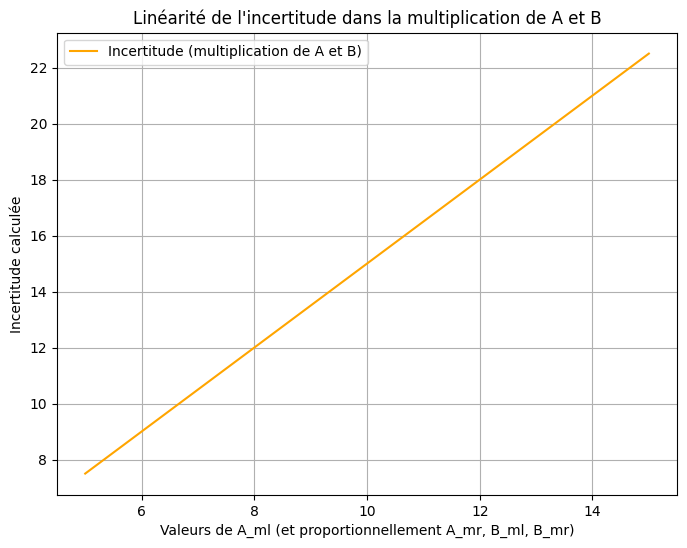

In [8]:
# Fonction pour calculer l'incertitude pour une multiplication
def calculate_multiplication_uncertainty(A_ml, A_mr, B_ml, B_mr):
    C_mr = A_mr * B_mr
    C_ml = A_ml * B_ml
    return C_mr - (C_ml + C_mr) / 2


# Stocker les incertitudes calculées pour la multiplication
multiplication_uncertainties = []

# Calcul de l'incertitude pour la multiplication avec différentes combinaisons de A et B
for A_ml, A_mr, B_ml, B_mr in zip(A_ml_values, A_mr_values, B_ml_values, B_mr_values):
    uncert_mult = calculate_multiplication_uncertainty(A_ml, A_mr, B_ml, B_mr)
    multiplication_uncertainties.append(uncert_mult)

# Visualisation des résultats pour la multiplication
plt.figure(figsize=(8, 6))
plt.plot(
    A_ml_values,
    multiplication_uncertainties,
    label="Incertitude (multiplication de A et B)",
    color="orange",
)
plt.xlabel("Valeurs de A_ml (et proportionnellement A_mr, B_ml, B_mr)")
plt.ylabel("Incertitude calculée")
plt.title("Linéarité de l'incertitude dans la multiplication de A et B")
plt.legend()
plt.grid(True)
plt.show()

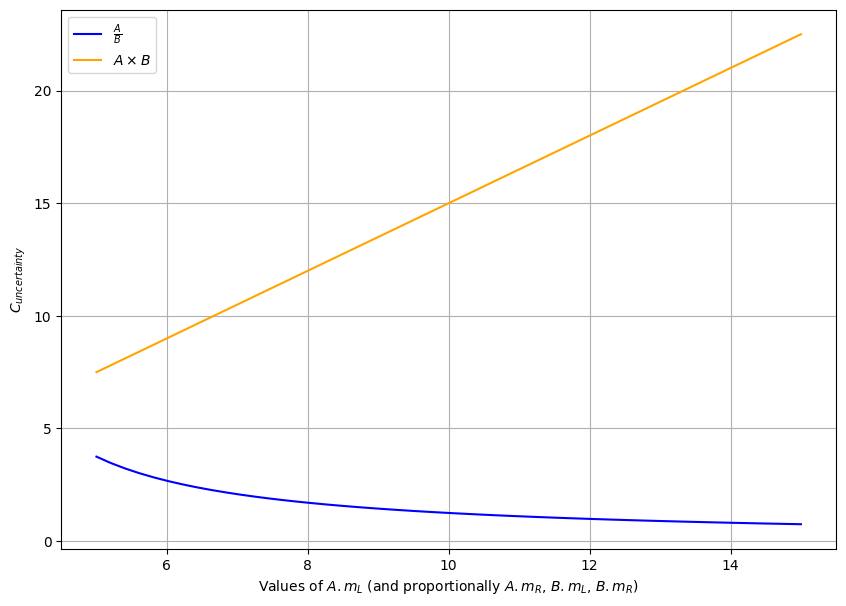

In [9]:
# Création de la figure avec deux tracés pour la multiplication et la division sur le même graphique
plt.figure(figsize=(10, 7))

# Tracé de l'incertitude pour la division
plt.plot(A_ml_values, uncertainties, label=r"$\frac{A}{B}$", color="blue")

# Tracé de l'incertitude pour la multiplication
plt.plot(
    A_ml_values,
    multiplication_uncertainties,
    label=r"$A \times B$",
    color="orange",
)

# Configuration des axes et du titre
plt.xlabel(
    "Values of "
    + r"$A.m_L$"
    + " (and proportionally "
    + r"$A.m_R$"
    + ", "
    + r"$B.m_L$"
    + ", "
    + r"$B.m_R$"
    + ")"
)
plt.ylabel(r"$C_{uncertainty}$")
# plt.title("Comparison of uncertainties in the multiplication and division of A and B")

# Ajout de la légende et de la grille
plt.legend()
plt.grid(True)

# Affichage de la figure
# plt.show()

plt.gcf().savefig("figures/mult_div_fuzzy.pdf", bbox_inches="tight")

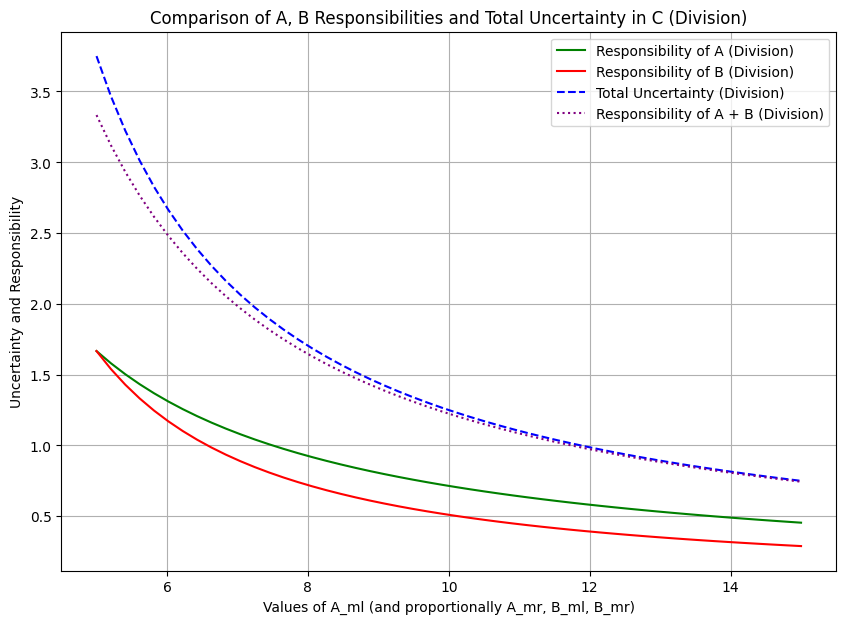

In [10]:
# Updated code with English labels for the graph

import numpy as np
import matplotlib.pyplot as plt


# Function to calculate uncertainty for division
def calculate_uncertainty(A_ml, A_mr, B_ml, B_mr):
    C_mr = A_mr / B_ml
    C_ml = A_ml / B_mr
    return C_mr - (C_ml + C_mr) / 2


# Function to calculate A's responsibility in division
def responsibility_A(A_ml, A_mr, B_ml, B_mr):
    A_c = (A_ml + A_mr) / 2
    B_c = (B_ml + B_mr) / 2
    C_c = A_c / B_c
    delta_A = A_mr - A_c
    return C_c * (delta_A / A_c)


# Function to calculate B's responsibility in division
def responsibility_B(A_ml, A_mr, B_ml, B_mr):
    A_c = (A_ml + A_mr) / 2
    B_c = (B_ml + B_mr) / 2
    C_c = A_c / B_c
    delta_B = B_mr - B_c
    return C_c * (delta_B / B_c)


# Varying values for A and B
A_ml_values = np.linspace(5, 15, 50)  # Lower bound of A varies from 5 to 15
A_mr_values = np.linspace(10, 20, 50)  # Upper bound of A varies from 10 to 20
B_ml_values = np.linspace(1, 5, 50)  # Lower bound of B varies from 1 to 5
B_mr_values = np.linspace(2, 6, 50)  # Upper bound of B varies from 2 to 6

# Store calculated uncertainties for division
total_uncertainties = []
responsibility_A_values = []
responsibility_B_values = []

# Calculate uncertainties and responsibilities for division
for A_ml, A_mr, B_ml, B_mr in zip(A_ml_values, A_mr_values, B_ml_values, B_mr_values):
    uncert_total = calculate_uncertainty(A_ml, A_mr, B_ml, B_mr)
    total_uncertainties.append(uncert_total)

    resp_A = responsibility_A(A_ml, A_mr, B_ml, B_mr)
    resp_B = responsibility_B(A_ml, A_mr, B_ml, B_mr)

    responsibility_A_values.append(resp_A)
    responsibility_B_values.append(resp_B)

# Calculate the sum of responsibilities for A and B
responsibility_sum = np.array(responsibility_A_values) + np.array(
    responsibility_B_values
)

# Plot responsibilities of A, B, their sum, and total uncertainty in the division
plt.figure(figsize=(10, 7))

# Plot A's responsibility in the division
plt.plot(
    A_ml_values,
    responsibility_A_values,
    label="Responsibility of A (Division)",
    color="green",
)

# Plot B's responsibility in the division
plt.plot(
    A_ml_values,
    responsibility_B_values,
    label="Responsibility of B (Division)",
    color="red",
)

# Plot total uncertainty in the division
plt.plot(
    A_ml_values,
    total_uncertainties,
    label="Total Uncertainty (Division)",
    color="blue",
    linestyle="--",
)

# Plot sum of responsibilities of A and B in the division
plt.plot(
    A_ml_values,
    responsibility_sum,
    label="Responsibility of A + B (Division)",
    color="purple",
    linestyle=":",
)

# Set axes labels and title
plt.xlabel("Values of A_ml (and proportionally A_mr, B_ml, B_mr)")
plt.ylabel("Uncertainty and Responsibility")
plt.title("Comparison of A, B Responsibilities and Total Uncertainty in C (Division)")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot

plt.gcf().savefig("figures/div_fuzzy.pdf", bbox_inches="tight")